In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [11]:
# TODO : Load data 
df = pd.read_csv('../ExercisesXP/AB_Test_Results.csv')

# Data Understanding

In [17]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID

# Dataframe Information
display(df.info())
display(df.head())

# Columns in DataFrame
print("\nColumns")
print(df.columns)

# Counting missing values 
print("\nMissing Values")
print(df.isna().sum())

# Descriptive statistics
print("\nDescriptive Statistics")
print(df.describe())

# Value counts for VARIANT_NAME
print("\nValue Counts for VARIANT_NAME")
df['VARIANT_NAME'].value_counts()

# Unique users in USER_ID
print(f"\nNumber of unique users in USER_ID -> {df['USER_ID'].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


None

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0



Columns
Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')

Missing Values
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

Descriptive Statistics
            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000

Value Counts for VARIANT_NAME

Number of unique users in USER_ID -> 6324


# Average Revenue by VARIANT_NAME

In [21]:
#TODO

avg_revenue = df.groupby('VARIANT_NAME')['REVENUE'].mean()

avg_revenue

VARIANT_NAME
control    0.129013
variant    0.070070
Name: REVENUE, dtype: float64

What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [ ]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?
# Null Hypothesis of the Shapiro-Wil test -> data comes from a normally distributed population

# Get revenue for control and variant groups 
control_revenue = df.loc[df['VARIANT_NAME'] == 'control', 'REVENUE']
variant_revenue = df.loc[df['VARIANT_NAME'] == 'variant', 'REVENUE']

# Shapiro 
stat_c, p_c = shapiro(control_revenue)
print(f"Control Group -> Statistic: {stat_c:.3f}, p-value: {p_c:.3f}")

stat_v, p_v = shapiro(variant_revenue)
print(f"Variant Group -> Statistic: {stat_v:.3f}, p-value: {p_v:.3f}\n")

# Interpret results

# Control
if p_c > 0.05:
    print("Fail to reject null hypothesis. Control Revenue comes from a normally distributed population")
else:
    print("Reject null hypothesis. Control Revenue DOESN'T come from a normally distributed population")

# Variant
if p_v > 0.05:
    print("Fail to reject null hypothesis. Variant Revenue comes from a normally distributed population")
else:
    print("Reject null hypothesis. Variant Revenue DOESN'T come from a normally distributed population")



Control Group -> Statistic: 0.018, p-value: 0.000
Variant Group -> Statistic: 0.027, p-value: 0.000

Reject null hypothesis. Control Revenue DOESN'T come from a normally distributed population
Reject null hypothesis. Variant Revenue DOESN'T come from a normally distributed population


/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


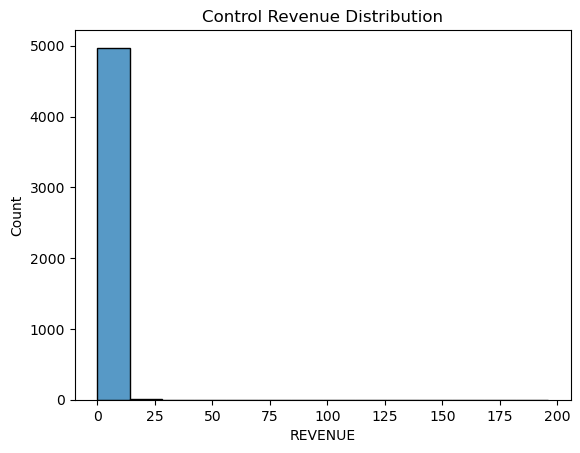

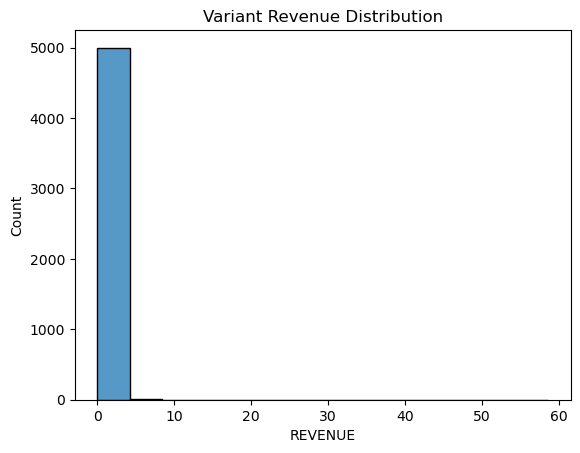

In [29]:
# Separate groups into control and variant
control_group = df[df['VARIANT_NAME'] == 'control']
variant_group = df[df['VARIANT_NAME'] == 'variant']

# Plot distributions of control and variant revenue 
sns.histplot(data=control_group, x='REVENUE')
plt.title("Control Revenue Distribution")
plt.show()

sns.histplot(data=variant_group, x='REVENUE')
plt.title("Variant Revenue Distribution")
plt.show()

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

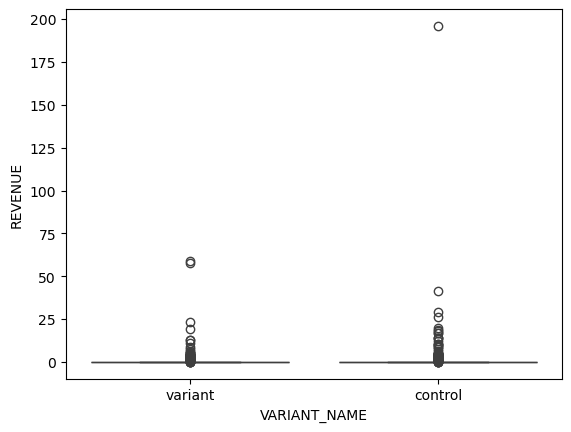

In [30]:
# Check distribution using boxplot 

sns.boxplot(data=df, x='VARIANT_NAME', y='REVENUE')

In [35]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?

# Get revenue from each group 
control_revenue = control_group['REVENUE']
variant_revenue = variant_group['REVENUE']

# Run levene's test - use center='median' as our data has outliers
stat, p_value = levene(control_revenue, variant_revenue, center='median')

print("Levene test statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis. The variances of control and variant groups differ significantly")
else:
    print("Failed to reject null hypothesis. The variances of control and variant are not significantly different")



Levene test statistic: 1.6158565214488871
p-value: 0.20370007853398742
Failed to reject null hypothesis. The variances of control and variant are not significantly different


# Non-Parametric Test (mannwhitneyu Test)

In [36]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?

# Run the Mann-Whitney U Test
stat, p_value = mannwhitneyu(control_revenue, variant_revenue, alternative='two-sided')
print(f"Mann Whitney U statistic: {stat:.3f}, p-value: {p_value:.3f}\n")

# Interpret result 
if p_value < 0.05:
    print("Reject null hypothesis. There's statistically significant evidence showing there's a difference between the mean of both groups")
else:
    print("Failed to reject null hypothesis. There is not statistically significant evidence that the means of the variants are different")

Mann Whitney U statistic: 12521564.000, p-value: 0.478

Failed to reject null hypothesis. There is not statistically significant evidence that the means of the variants are different


From the Mann Whitney U Test we can see that there's no statistically significant evidence that the mean between the control and variant groups differs. 

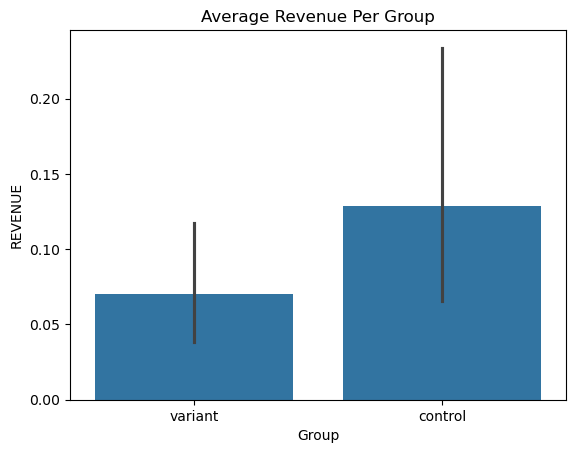

In [ ]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library

sns.barplot(data=df, x='VARIANT_NAME', y='REVENUE', estimator=np.mean)
plt.title("Average Revenue Per Group")
plt.xlabel("Group")
plt.show()

The reason why we see a big difference in average revenue between the variant and control groups is due to one outlier that belongs to the control group with 1 purchase above 100 dollars. 

In this exercise we weren't asked to remove that outlier, however, it was important to mention why the average revenue of control is way higher than the variant. 